# Introduction to Reproducing Kernel Hilbert Spaces

#### Pierre-Cyril Aubin-Frankowski, 15th of October 2018 (please quote this notebook if you wish to reuse some of its contents)

## An introduction through modelization problems

Most modelization problems can be written as selecting, with respect to a set of observations $(x_i,y_i)_i \in X \times Y$, where $X$ and $Y$ are two sets, a function $f \in \mathcal{M}$ where $\mathcal{M}$ is a class of models. We wish that $y_i\simeq f(x_i)$ and that, for points $x$ that have not been observed, the value $f(x)$ remains plausible. With respect to $\mathcal{M}$, the function $f$ has to be a "best-fit" based on the observed data (i.e. the best model in $\mathcal{M}$ to solve the task). "Best-fit" means we need a notion of optimality, which is mathematically translated to the following problem:

$$\min_{f\in\mathcal{M}} L(\{x_{i}\}_i,\{y_{i}\}_i,f)+R(f)$$

The **loss function** $L$ monitors the error between the prediction $f(x_i)$ and the observation $y_i$. For regression problems, when $Y=\mathbb{R}^n$, it is typically a sum of squared norm distances $\|y_i - f(x_i)\|_{\mathbb{R}^n}^2$. For classification problems, when $Y=\{0,1\}$, it can be the "hinge-loss", the "logistic-loss",...

The **regularization function** $R$ monitors the variations between the predictions $f(x_i)$ and $f(x_j)$. It "regularizes" the solution in order to avoid overfitting the observed data. Another way to see it is that is has an "homogenizing" effect such that points that are "close" should bear "close" values. Typical examples are the total variation norm, which is related to harmonic functions.

For a general discussion about the machine learning approach to modelization and decision-making, see chapter 2 (pp.9-24 ) of a master thesis on public policy (in French) https://hal-enpc.archives-ouvertes.fr/hal-01876156 (further references therein, shorter version to come).

Many optimization problems are written in a convex setting in order to enjoy both tractability and uniqueness of the solution. However, neural networks evade this common-sense law and lead us astray on the path of stochastic gradient descent (SGD) and all the tedious ad-hoc techniques to have the algorithms that seek the optimal solution converge.

To set a few rules, the choice of loss function depends on the noise on the observations $(y_i)_i$. The regularization function is related to the choice of the class $\mathcal{M}$ of models and to the set of observations $(x_i)_i$.

Which class $\mathcal{M}$ of models should we choose? There are two ways to approach the problem: **parametrical** and **non-parametrical**. At the most parametrical end stand neural networks with their billions of parameters. At the most non-parametrical end stand kernel methods and the few parameters that define the approximation space.

In **reproducing kernel Hilbert space (RKHS)** theory, the class $\mathcal{M}$ is a Hilbert space of functions on $X$, embedded with a topology stronger than the pointwise topology.

## A historical introduction to RKHS
We briefly retrace the historical evolution of RKHS theory thanks to the preface of Saitoh and Sawano (2016). This theory was reborn multiple times, first in 1907 in harmonic analysis with works of Mercer and Zaremba, then in 1921 with the articles of Szegö and Bergman. It reached its complete form in 1950 thanks to Nachman Aronszajn and finally Laurent Schwartz in 1964. It remained overall confidential in all its evolution, until the learning theory school of Vapnik et al., started in the 60's , popularized the use of support-vector machines (SVMs) in the 90's. Since then it is the most mathematical technique available in machine learning.

It is a theory so elegant and concise, that it appears naturally at the crossroads of multiple fields in mathematics: 

* Hilbertian functional analysis and Sobolev spaces are a special case of kernel theory.
* Kernel operators, integral kernels, Green functions of partial differential equations all derive from the seminal work of Mercer and often use Bochner's representation theorem (1929).
* Gaussian processes are related through the Gram-covariance matrix to kernel theory. Stochastic processes with Brownian movement are thus close-by as well.
* Non-linear statistics such as kernel spectral theory or kernel principal component analysis (KPCA) are just a reformulation of classical linear statistics to a non-linear setting.



## Crash course in RKHS

Let $X$ be a set deprived of any structure. A **kernel** on $X$ is a function of $X \times X$ in $\mathbb{R}$.

<!--- #### Definition: Positive definite kernel in $\mathbb{R}$--->

#### Definition: Positive definite kernel in $\mathbb{R}$

A kernel $K:X\times X \rightarrow\mathbb{R}$ is called positive definite if it verifies:
* the symmetry property: $\forall x, y \in X, \; K(x,y)=K(y,x)$
* the positivity condition:$$\forall (a_i)_{i=1..N}\in \mathbb{R}^N, (x_i)_{i=1..N}\in X^N, \; \sum_{i=1}^{N}\sum_{j=1}^{N} a_ia_jK(x_i,x_j) \geq 0$$
---
Such a kernel is a proto-scalar product over the set $X$: that is symmetrical and positive definite but not necessarily bilinear.

**Examples:**
* The scalar product $(\cdot,\cdot)_{\mathbb{R}^n}$ of $\mathbb{R}^n$ verifies the positivity condition which writes as:
	$$\forall (a_i)\in \mathbb{R}^N, \;(x_i)\in X^N, \; \sum_{i=1}^{N}\sum_{j=1}^{N} a_ia_jK(x_i,x_j):=\sum_{i=1}^{N}\sum_{j=1}^{N} a_ia_j(x_i,x_j)_{\mathbb{R}^n}
	=\left\|\sum_{i=1}^{N} a_i x_i \right\|^2_{\mathbb{R}^n}\geq 0$$
* The Gaussian kernel over $\mathbb{R}^n$, $K(x,y)=\exp({-\frac{\|x-y\|_{\mathbb{R}^n}^2}{2\sigma^2}})$, is positive definite.
* The Laplacian kernel over $\mathbb{R}^n$, $K(x,y)=\exp({-\lambda\|x-y\|_{\mathbb{R}^n}})$, is positive definite.
* The Cauchy kernel over $\mathbb{R}^n$, $K(x,y)=\frac{1}{1+\frac{\|x-y\|_{\mathbb{R}^n}^2}{\sigma^2}}$, is positive definite.
* The minimum kernel over $[0,1]$, $K(x,y)=\min(x,y)$, is positive definite.
* The maximum kernel over $[0,1]$, $K(x,y)=\max(x,y)$, is not positive definite.
* The kernel over $]-1,1[$ defined by $K(x,y)=\frac{1}{1-xy}$,  is positive definite.

Let $H$ be a Hilbert space, suppose there exists a function $\Phi:X\rightarrow H$. Then the kernel on $X$ defined by $K(x,y):=(\Phi(x),\Phi(y))_H$ is positive definite. If we can embed $X$ in $H$, we get positive definite kernels! Actually there is a theorem for that: 

#### Theorem: Reproducing property and positive definite kernels (Aronszajn, 1950)

A kernel $K$ over $X$ is positive definite if and only if there exists a space $H_K \subset \mathbb{R}^X$ of real-valued functions over $X$ which is a Hilbert space and a function $\Phi : X \rightarrow H_K$ such that: $$\forall x, y \in X, \; K(x,y)=(\Phi(x),\Phi(y))_{H_K}$$

---

Furthermore we know the Hilbert space $H_K$ quite well, there is a one-to-one correspondence between $K$ and $H_K$ (which is why we could use $K$ as an index). We know that the embedding function is:
 $$\Phi:x\mapsto\Phi(x):=K_x :\left\{
	\begin{array}{ll}
	X \rightarrow \mathbb{R}\\ 
	y \in X \mapsto K(x,y)
	\end{array} 	\right.$$
The reproducing kernel Hilbert space $H_K$, built from $X$ and $K$, is the completion for the kernel $K$ of the space $Vect(\{K_x\}_{x \in X})$. The space $Vect(\{K_x\}_{x \in X})$ is thus dense in $H_K$ for the distance induced by the kernel. The functions $K_x(\cdot)$ play the role of Dirac masses on $H_K$, they have the **reproducing property**:
$$\forall x \in X, \; \forall f \in H_K, \; f(x)=(f,K_x)_{H_K}$$


So if we have a positive definite kernel on $X$, we can stop working on the set $X$, which had no natural operations, to work instead in a Hilbert space $H_K$!

![Img: X embedded in Hk](RelevementRKHS.png)

**Example:**
The minimum kernel over $[0,1]$, $K(x,y)=\min(x,y)$, actually defines the Sobolev space of order 1 of absolutely continuous functions with value $0$ in $0$. This space is endowed with the scalar product:
$$(f,g)_{H^1_0}:=\int_0^1 f'(x) g'(x) dx$$

Do you see a clear relation between the min operation and an integral of derivatives? It shows that it is in general very hard to identify $(H_K,(\cdot,\cdot)_{H_K})$ based on the kernel $K$.

Computing general Hilbert scalar products is numerically hard! (Think about the necessary discretization of Sobolev norms!) Nonetheless we have the, obvious but useful, **kernel trick**:
$$K(x,y)=K_x(y)=(K_x,K_y)_{H_K}$$
Thus it is not hard to compute the scalar product for finite linear combinations of the functions $K_x$. However the Hilbert space is a priori of infinite dimension, is it still tractable to look for a function in a class of models with a (countable) infinite degrees of liberty? The following **representation theorem** explains why we can still work in finite dimension.

## Back to optimization and representation theorem
Let's reconsider our modelization problem, when the class of models is chosen to be $H_K$:
$$\min_{f\in H_K} L(\{x_{i}\}_i,\{y_{i}\}_i,f)+R(f)$$

#### Theorem: Regularization theorem
Suppose that there is a finite number of observations, that $L(\{x_{i}\}_i,\{y_{i}\}_i,f):=L(\{f(x_{i})\}_i,\{y_{i}\}_i)$ depends only on the approximated values $\{f(x_{i})\}_i$, while $R(f):=R(\|f\|_{H_K})$ depends only on $\|f\|_{H_K}$ and that $R$ is increasing. Then the optimal model $\overline{f}$ only depends on the $(K_{x_i}(\cdot))_{i\leq n}$ through:
$$ \exists (\alpha_i)_{i\leq n} \in \mathbb{R}^n \; \; \overline{f}(\cdot)=\sum_{i=1}^n \alpha_i K_{x_i}(\cdot)$$

---

This theorem shows that there is no "aditional information" in points that have not be seen when we penalize the norm $\|f\|_{H_K}$. Actually the smaller the RKHS norm, the smoother the function.

With this theorem under hand, we see that for a finite number of observations we work in finite dimensional space $Vect(K_{x_i}(\cdot))_{i\leq n}$ for which the scalar product is easy to compute thanks to the kernel trick.

This allows to solve tractably problems such as the Kernel Ridge Regression (**KRR**), a non-linear least squares:
$$\min_{f\in H_K} \sum_{i=1}^n |y_i-f(x_i)|^2+\lambda\|f\|_{H_K}^2$$

The **KRR** is quite useful for non-linear approximation, but it is not the technique which acquired the fame kernel methods have nowadays. Support vector machines (SVMs) were instrumental for the rebirth of kernel theory.



## Implementation of Kernel Ridge Regression (KRR)
In this section, we show an implementation of Kernel Ridge Regression (KRR) that underlines the effect of regularization. Here follows a matplotlib image with a slider for the effect of lambda.

We perturbed a sinusoidal curve by a quite heavy Gaussian noise. We recover a solution $\overline{f}(\cdot)=\sum_{i=1}^n \alpha_i K_{x_i}(\cdot)$ that is "non-parametrical" in the sense that we did not say we were looking for $\overline{f}(\cdot)=A\cdot \cos(\omega \cdot + \varphi)$. We have no notion of frequency, pulsation, or phase. We just wish agnostically to find $f$ such that $y_i\simeq f(x_i)$ and that could be generalized to other points close to the observed $x_i$.

We used a Gaussian kernel of variance 5 times the step of the x-axis (i.e. the distance between points of the x-axis). This leads to an $H_{\infty}([0,1])$ approximation of the curve, where $H_{\infty}$ is the Sobolev space of $\infty$ order (a completion of $\mathcal(D)([0,1])$ and of the Schwartz space of functions).

<div class="alert alert-block alert-warning">
<b>Python libraries version</b> 

In order to run the code, it may be necessary to download manually the latest version of matplotlib (>3.0.0). We recommend to download Anaconda as a Python distribution suite for non-advanced users.

In a (Anaconda) promt terminal, to update matplotlib one should write: > conda update matplotlib
</div>



In [48]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

### Declaration of initial variables

We assume the number of $N = 200$ points, $\sigma = \frac{5.}{N}, \; \vec{t} = \begin{bmatrix} 0., 0.005, 0.01, ..., 0.995\end{bmatrix}.$

For our problem we will approximate a scattered clound of points that somewhat follow a sinus wave punt the points near the sine wave are randomly generated. Those points will be randomly drawn from a normal (Gaussian) distribution. Let our noise function be named $R \propto Norm(\mu,\sigma)$ that depends on two internal variables, mean and standard deviation, which shall be $\mu = 0$ and $\sigma = 2.$ 

Finally, our vector of scattered points shall be saved in $g(\vec{t}) = a_0 \sin{\left( 2 \pi f_{0} \vec{t}\right)}.$

The main parameter we are going to start changing is $\lambda$. Right now for demonstrative purposes we will give it an initial value of $\lambda_0 = 0.02$

In [49]:
N = 200
sigma_kernel= 5./N
t = np.arange(0.0, 1.0, 1./N)
mu, sigma_noise = 0, 2 # mean and standard deviation for noise signal generation
R_noise = np.random.normal(mu, sigma_noise, t.size)
a0      = 5
f0      = 2
lmbda0  = 1E-2
g = a0*np.sin(2*np.pi*f0*t)+R_noise # basically a set of randomly scattered points that somewhat follow a sinus wave
#print(t)

### Solution

To get a better view of the independent matrix components and how we arrive at our final values I have dedicated this section here.
 
$$K = \exp{\left(-\frac{d(x,y)}{\sigma^2}\right)}, \quad d(x,y) = \begin{bmatrix}a_{11} & a_{12} & ... & a_{1N} \\a_{21} & a_{22} & ... & a_{2N} \\ ... & ... & ... & ... \\ a_{N1} & a_{N2} & ... & a_{NN}\end{bmatrix}$$

For our matrix values we shall construct pairwise distances between observations in N-dimensional space. This gives us the benefit of working with a symmetric matrix, meaning $a_{11} = a_{12} = ... = a_{NN} = a_1$, as well as $a_{12} = a_{21} = ... = a_2$ and $a_{13} = a_{31} = ... = a_3$ and so on.

$$ K = \begin{bmatrix}\exp{\left(-\frac{a_{1}}{\sigma^2}\right)} & \exp{\left(-\frac{a_{2}}{\sigma^2}\right)} &   \exp{\left(-\frac{a_{3}}{\sigma^2}\right)} & ... & 0. \\ \exp{\left(-\frac{a_{2}}{\sigma^2}\right)} & \exp{\left(-\frac{a_{1}}{\sigma^2}\right)} &   \exp{\left(-\frac{a_{2}}{\sigma^2}\right)} & ... & 0. \\ \exp{\left(-\frac{a_{3}}{\sigma^2}\right)} & \exp{\left(-\frac{a_{2}}{\sigma^2}\right)} &   \exp{\left(-\frac{a_{1}}{\sigma^2}\right)} & ... & 0. \\ ...& ... & ... & ... & ... \\ 0. & ... & \exp{\left(-\frac{a_{3}}{\sigma^2}\right)} & \exp{\left(-\frac{a_{2}}{\sigma^2}\right)} &   \exp{\left(-\frac{a_{1}}{\sigma^2}\right)} \end{bmatrix} $$
$$\boxed{S_{approx} = K \cdot \mathbf{u}}$$
$$(K+\lambda_0 \cdot N \cdot I) \mathbf{u} = g, \quad \mathbf{u} = (K+\lambda_0 \cdot N \cdot I)^{-1} g$$

In [50]:
from scipy.spatial.distance import pdist, squareform
pairwise_sq_dists = squareform(pdist(np.reshape(t,[-1,1]), 'sqeuclidean')) # a list of 200 list with 200 elements inside one list
K = np.exp(-pairwise_sq_dists / sigma_kernel**2) # a sparce matrix 
#print(K)
u = K+lmbda0*t.size*np.eye(t.size)
Sapprox = np.dot(K,np.linalg.solve(u, g))
#print(sapprox)


## Plotting

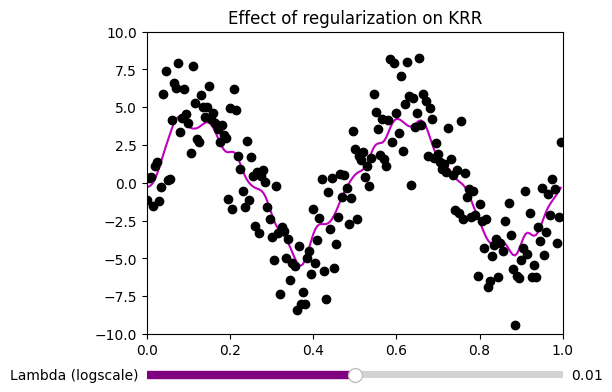

In [51]:
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)

l1, = plt.plot(t, Sapprox,'m-') # plotting the results of Sapprox vector
l, = plt.plot(t, g,'ko')    # plotting the initial noise
plt.axis([0, 1, -10, 10])
plt.title('Effect of regularization on KRR')
axlmbda = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor='magenta', xscale='log')
slmbda = Slider(axlmbda, 'Lambda (logscale)', 1E-6, 1E2, valinit=lmbda0, color = "purple")

### All in one function to plot $KRR(N,\sigma,\lambda)$

* N - number of noise points
* $\sigma$ - kernel parameter (try 5.0)
* $\lambda$ - kernel parameter (try 0.02)

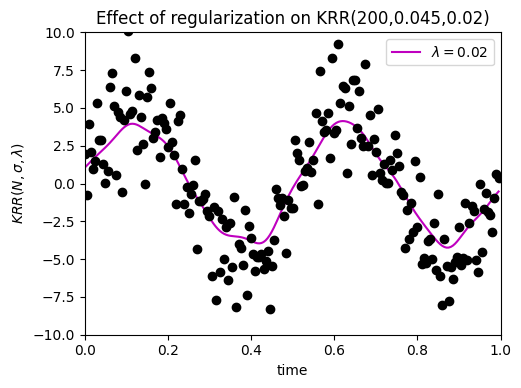

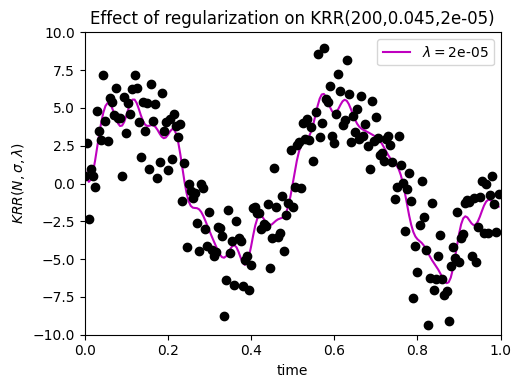

In [52]:
# all in one
def KRR(N, sig, lmbda):
    #N = 200
    sigma_kernel= sig/N
    t = np.arange(0.0, 1.0, 1./N)
    mu, sigma_noise = 0, 2 # mean and standard deviation for noise signal generation
    R_noise = np.random.normal(mu, sigma_noise, t.size)
    a0      = 5
    f0      = 2
    g = a0*np.sin(2*np.pi*f0*t)+R_noise
    pairwise_sq_dists = sp.spatial.distance.squareform(
            sp.spatial.distance.pdist(np.reshape(t,[-1,1]), 'sqeuclidean')) # a list of N list with N elements inside one list
    K = np.exp(-pairwise_sq_dists / sigma_kernel**2) # a sparce matrix 
    Sapprox = np.dot(K,np.linalg.solve(K+lmbda*t.size*np.eye(t.size), g))
    fig, ax = plt.subplots()
    plt.subplots_adjust(left=0.25, bottom=0.25)
    plt.plot(t, Sapprox,'m-', label ="$\lambda =$%s" % lmbda) # plotting the results of Sapprox vector
    plt.plot(t, g,'ko')    # plotting the initial noise
    plt.axis([0, 1, -10, 10])
    plt.title('Effect of regularization on KRR(%d,%s,%s)' % (N,sigma_kernel, lmbda))
    #axlmbda = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor='magenta', xscale='log')
    #slmbda = Slider(axlmbda, 'Lambda (logscale)', 1E-6, 1E2, valinit=lmbda0, color = "purple")
    plt.ylabel('$KRR(N,\sigma,\lambda)$')
    plt.xlabel('time')
    leg = ax.legend(loc ="upper right")
    plt.show()

KRR(200,9,0.02)
KRR(200,9,0.00002)

In [53]:
#KRR(200,5,0.0002) 

In [54]:
"""import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
plt.rcParams['figure.dpi'] = 100
                           
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
number_pts=200
sigma_kernel=5./number_pts
t = np.arange(0.0, 1.0, 1./number_pts)

mu, sigma_noise = 0, 2 # mean and standard deviation
noise = np.random.normal(mu, sigma_noise, t.size)

a0 = 5
f0 = 2
lmbda0=1E-2
s = a0*np.sin(2*np.pi*f0*t)+noise

from scipy.spatial.distance import pdist, squareform
pairwise_sq_dists = squareform(pdist(np.reshape(t,[-1,1]), 'sqeuclidean'))
K = np.exp(-pairwise_sq_dists / sigma_kernel**2)

sapprox = np.dot(K,np.linalg.solve(K+lmbda0*t.size*np.eye(t.size), s))

l1, = plt.plot(t, sapprox,'r-')
l, = plt.plot(t, s,'ko')
plt.axis([0, 1, -10, 10])

plt.title('Effect of regularization on KRR')


axcolor = 'lightgoldenrodyellow'
axlmbda = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor,xscale='log')

slmbda = Slider(axlmbda, 'Lambda (logscale)', 1E-6, 1E2, valinit=lmbda0)


def update(val):
    lmbda = slmbda .val
    slmbda.valtext.set_text(np.log10(lmbda))    
    l1.set_ydata(np.dot(K,np.linalg.solve(K+lmbda*t.size*np.eye(t.size), s)))    
    fig.canvas.draw_idle()
slmbda.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    slmbda.reset()
button.on_clicked(reset)

plt.show()
"""

"import numpy as np\nimport matplotlib.pyplot as plt\nfrom matplotlib.widgets import Slider, Button\nplt.rcParams['figure.dpi'] = 100\n                           \nfig, ax = plt.subplots()\nplt.subplots_adjust(left=0.25, bottom=0.25)\nnumber_pts=200\nsigma_kernel=5./number_pts\nt = np.arange(0.0, 1.0, 1./number_pts)\n\nmu, sigma_noise = 0, 2 # mean and standard deviation\nnoise = np.random.normal(mu, sigma_noise, t.size)\n\na0 = 5\nf0 = 2\nlmbda0=1E-2\ns = a0*np.sin(2*np.pi*f0*t)+noise\n\nfrom scipy.spatial.distance import pdist, squareform\npairwise_sq_dists = squareform(pdist(np.reshape(t,[-1,1]), 'sqeuclidean'))\nK = np.exp(-pairwise_sq_dists / sigma_kernel**2)\n\nsapprox = np.dot(K,np.linalg.solve(K+lmbda0*t.size*np.eye(t.size), s))\n\nl1, = plt.plot(t, sapprox,'r-')\nl, = plt.plot(t, s,'ko')\nplt.axis([0, 1, -10, 10])\n\nplt.title('Effect of regularization on KRR')\n\n\naxcolor = 'lightgoldenrodyellow'\naxlmbda = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor,xscale='log')\n

(Oral presentation) Comments on the curve, effect of the parameters (lambda, number of points, width of the Gaussian kernel). Tractability up to $10^5$ points on a normal machine due to the $O(n^3)$ complexity where $n$ is the number of points.

<!--- ## An example of optimization problem: classification through SVMs ---> 

<!---The **Support-Vector Machine (SVM) problem** is a classification problem. For two classes $Y=\{0,1\}$, it is written as:
$$\min_{f\in H_K} \sum_{i=1}^n max(1-y_i\cdot f(x_i),0)+\lambda\|f\|_{H_K}^2$$
The term $y_if(x_i)$ is called the margin. The intuition for formulating classification this way is that to classify well $x_i$ we should give the same sign to $y_i$ and $f(x_i)$. So when $y_i\cdot f(x_i)\geq 1$ (right classification with some margin), there is no penalization in the first term. On the contrary, if $y_i\cdot f(x_i)< 1$, bias penalization groes linearly with the erroneous prediction. The regularization term is the same as in **KRR**.---> 

## Take-home message

In this crash-course in Reproducing Kernel Hilbert Spaces, we have seen that, from a machine learning point of view, it is a non-parametrical modelization technique, deeply rooted in functional analysis. Mathematically-speaking it reaches many fields, some of them listed in the references below. It allows to transpose some non-linear problems in low-dimension in linear ones in (countable) infinite dimension.

Despite the infinite dimension, the representer theorem shows that it can be enough to work in a finite dimension for finite datasets. The kernel trick allows to compute the scalar product in these cases, even the expression of the scalar product can be very different from the kernel.

Reproducing kernels theory is very useful to linearize non-linear problems of low dimension. It is computationally intensive for large-scale problems but research still finds its ways to extend this mindset.

Kernels can be seen as:
* an embedding $X\rightarrow H_K$ that allows for linear operations despite a non-vectorial $X$,
* a similarity measure between points of $X$ akin to a topographic map,
* a class $\mathcal{M}$ of models that has exquisite properties that allow to compare models thanks to the norm $\|\cdot\|_{H_K}$.

## To delve further into the theory: a few references
#### Slides
A general course given by Jean-Philippe Vert for the M2 MVA (ENS Paris-Saclay): http://members.cbio.mines-paristech.fr/~jvert/svn/kernelcourse/slides/master2017/master2017.pdf
<br>
Webpage of the course: http://members.cbio.mines-paristech.fr/~jvert/svn/kernelcourse/course/2018mva/index.html
<br><br>
An introductory course in large-scale problems given by Jean-Philippe Vert for graduate students (Mines ParisTech): http://members.cbio.mines-paristech.fr/~jvert/svn/kernelcourse/slides/lsml18/lsml18.pdf
<br>
Webpage of the course: http://members.cbio.mines-paristech.fr/~jvert/svn/lsml/lsml18/

#### Books and articles
Accessible basics: *Learning with Kernels*, Bernhard Schölkopf and Alexander J. Smola, 2001 (short version) https://www.cs.utah.edu/~piyush/teaching/learning-with-kernels.pdf or (long version) https://mitpress.mit.edu/books/learning-kernels

More kernels in learning theory: *Kernel Methods in Machine Learning*, Thomas Hofmann, Bernhard Schölkopf and  Alexander J. Smola, 2008 http://www.kernel-machines.org/publications/pdfs/0701907.pdf

General theory and theoretical application to PDEs: *Theory of Reproducing Kernels and Applications*, Saburoh Saitoh and Yoshihiro Sawano, 2016 https://www.springer.com/de/book/9789811005299

Application to stochastic systems and statistics: *Reproducing Kernel Hilbert Spaces in Probability and Statistics*, Alain Berlinet and Christine Thomas-Agnan, 2004 https://www.springer.com/us/book/9781402076794

To go beyond Bochner's theorem in Fourier transforms: *Harmonic Analysis on Semigroups
Theory of Positive Definite and Related Functions*, Christian Berg, Paul Ressel and Jens Peter Reus Christensen, 1984 https://www.springer.com/us/book/9780387909257

To go beyond functions toward general Hilbert spaces: *Sous-espaces hilbertiens et noyaux associés*, Laurent Schwartz, 1964, http://sites.mathdoc.fr/OCLS/pdf/OCLS_1964__36__153_0.pdf (see Berlinet and Thomas-Agnan pp.37-39 for an overview of applications)

To go beyond p.d. kernels toward general kernels: *Learning with Non-Positive Kernels*, Cheng Soon Ong, Stéphane Canu, Xavier Mary and Alexander J. Smola http://is.tuebingen.mpg.de/fileadmin/user_upload/files/publications/pdf3416.pdf